Сделать квантовую телепортацию по схеме

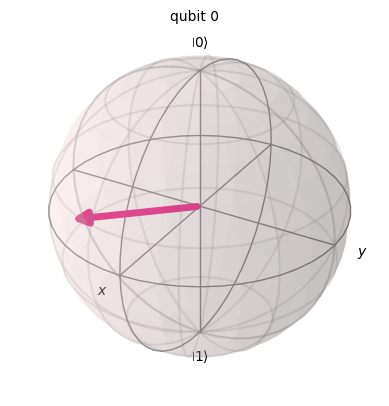

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import random_statevector

# Создание квантовой схемы с 3 кубитами и 2 классическими битами
qc = QuantumCircuit(3, 2)

# инициализируем первый кубит в рандомно состоянии
psi = random_statevector(2)
qc.initialize(psi, 0)

plot_bloch_multivector(psi)

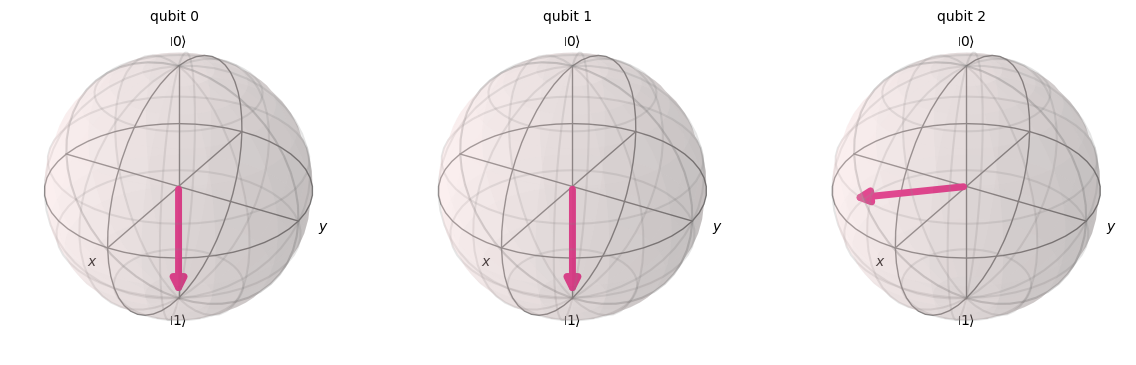

In [ ]:

# Создание пары Белла между вторым и третьим кубитами
qc.h(1)      
qc.cx(1, 2)   

# Телепортация состояния 
qc.cx(0, 1)
qc.h(0)

# Измерение q0 и q1
qc.measure(0, 0)  # Измеряем q0 в классический бит 0
qc.measure(1, 1)  # Измеряем q1 в классический бит 1

# Применение операторов коррекции на q2
qc.z(2).c_if(0, 1)
qc.x(2).c_if(1, 1)

# Сохранение состояния перед измерением
qc.save_statevector()

# Симуляция схемы
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# Результаты измерений
counts = result.get_counts()
state = result.get_statevector()
plot_bloch_multivector(state)

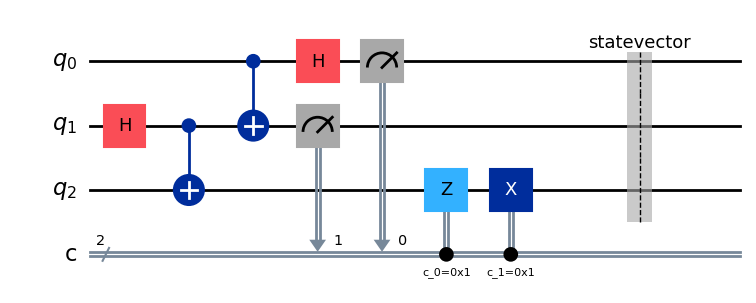

In [23]:
# Визуализация схемы и гистограммы
qc.draw(output='mpl')